<a href="https://colab.research.google.com/github/JaiVR/suttmltask_1/blob/main/sutt_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
dataset = pd.read_csv('sutt.csv')

X = dataset.iloc[:, :-1].values
# y is the gpl ,the dependent variable
y = dataset.iloc[:, -1].values

In [62]:
dataset.dtypes

SEX                               object
 AGES                            float64
ADMISSION MODE                    object
CGPA - 1                         float64
CGPA-2                           float64
 CLUB / DEPARTMENT                object
BOARD STUDIED                     object
DAYS SINCE LAST SHOWER             int64
BIRTHDAY                          object
TREATS GIVEN                       int64
 HAS A S/O ?                      object
ATTENDS LECTURES                  object
CHARACTER                         object
PIZZERIA EXPENDITURE (annual)      int64
GRAMS / MONTH                    float64
GPL                               object
dtype: object

In [63]:
print(X)

[['male' 19.0 'BITSAT' ... 'LITE' 20495 5.0]
 ['female' 21.0 'DASA' ... 'GHOT' 2361 0.2]
 ['female' 20.0 'BITSAT' ... 'GHOT' 8548 0.3]
 ...
 ['female' 21.0 'BITSAT' ... 'LITE' 17559 5.4]
 ['male' 22.0 'DASA' ... 'GHOT' 16411 8.7]
 ['female' 17.0 'BITSAT' ... 'GHOT' 5476 0.25]]


In [64]:
print(y)

['NO' 'YES' 'YES' ... 'NO' 'NO' 'YES']


In [65]:
#fixing the casing issues in club/dept. column
def replace_value(value):
    if value == 's':
        return 'sutt'
    elif value == 'd' or value == 'v':
        return 'dvm'
    elif value == 'g':
        return 'gaming club'
    elif value == 'm':
        return 'mountaineering club'
    else:
        return value


dataset[' CLUB / DEPARTMENT'] = dataset[' CLUB / DEPARTMENT'].str.lower().str[0].apply(replace_value)

print(dataset[' CLUB / DEPARTMENT'])


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1094            NaN
1095            NaN
1096    gaming club
1097            NaN
1098            NaN
Name:  CLUB / DEPARTMENT, Length: 1099, dtype: object


In [66]:
#taking care of missing values
#this code replaces the missing value with the mean of that particular column

columns_to_impute = [1,3,4,7,9,13,14]
X[:, columns_to_impute] = X[:, columns_to_impute].astype(float)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, columns_to_impute])
X[:, columns_to_impute] = imputer.transform(X[:, columns_to_impute])

In [67]:
print(X)

[['male' 19.0 'BITSAT' ... 'LITE' 20495.0 5.0]
 ['female' 21.0 'DASA' ... 'GHOT' 2361.0 0.2]
 ['female' 20.0 'BITSAT' ... 'GHOT' 8548.0 0.3]
 ...
 ['female' 21.0 'BITSAT' ... 'LITE' 17559.0 5.4]
 ['male' 22.0 'DASA' ... 'GHOT' 16411.0 8.7]
 ['female' 17.0 'BITSAT' ... 'GHOT' 5476.0 0.25]]


In [68]:
#encoding the categorical data using one hot encoding
#independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

dataset.iloc[:, 5].replace('', 'NA', inplace=True)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,5,6,10,11,12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [69]:
print(X)

[[0.0 1.0 1.0 ... 4.0 20495.0 5.0]
 [1.0 0.0 0.0 ... 1.0 2361.0 0.2]
 [1.0 0.0 1.0 ... 4.0 8548.0 0.3]
 ...
 [1.0 0.0 1.0 ... 4.0 17559.0 5.4]
 [0.0 1.0 0.0 ... 3.0 16411.0 8.7]
 [1.0 0.0 1.0 ... 1.0 5476.0 0.25]]


In [70]:
#encoding dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [71]:
print(y)

[0 1 1 ... 0 0 1]


In [72]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [73]:
print(X_train)

[[0.0 1.0 1.0 ... 4.0 15140.0 8.6]
 [0.0 1.0 1.0 ... 4.0 13289.0 7.8]
 [1.0 0.0 0.0 ... 4.0 4086.0 0.2]
 ...
 [1.0 0.0 1.0 ... 4.0 17559.0 5.4]
 [0.0 1.0 0.0 ... 0.0 19499.0 9.9]
 [1.0 0.0 0.0 ... 4.0 6819.0 0.25]]


In [74]:
print(X_test)

[[1.0 0.0 0.0 ... 4.0 7746.0 0.35]
 [0.0 1.0 1.0 ... 3.0 15944.0 4.3]
 [1.0 0.0 0.0 ... 0.0 2357.0 0.45]
 ...
 [0.0 1.0 1.0 ... 2.0 12406.0 9.0]
 [0.0 1.0 1.0 ... 1.0 16605.0 9.0]
 [0.0 1.0 0.0 ... 0.0 12061.0 3.4]]


In [75]:
print(y_train)

[0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 

In [76]:
print(y_test)

[1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]


In [77]:
#feauture scaling using standaridization
from sklearn.preprocessing import StandardScaler
columns_to_stand = [1,3,4,7,9,13,14,15]
sc = StandardScaler()
X_train[:, columns_to_stand] = sc.fit_transform(X_train[:, columns_to_stand])
X_test[:, columns_to_stand] = sc.transform(X_test[:, columns_to_stand])

In [78]:
print(X_train)

[[0.0 0.7491854665119192 1.0 ... 4.0 15140.0 8.6]
 [0.0 0.7491854665119192 1.0 ... 4.0 13289.0 7.8]
 [1.0 -1.3347829672348437 0.0 ... 4.0 4086.0 0.2]
 ...
 [1.0 -1.3347829672348437 1.0 ... 4.0 17559.0 5.4]
 [0.0 0.7491854665119192 0.0 ... 0.0 19499.0 9.9]
 [1.0 -1.3347829672348437 0.0 ... 4.0 6819.0 0.25]]


In [79]:
print(X_test)

[[1.0 -1.3347829672348437 0.0 ... 4.0 7746.0 0.35]
 [0.0 0.7491854665119192 1.0 ... 3.0 15944.0 4.3]
 [1.0 -1.3347829672348437 0.0 ... 0.0 2357.0 0.45]
 ...
 [0.0 0.7491854665119192 1.0 ... 2.0 12406.0 9.0]
 [0.0 0.7491854665119192 1.0 ... 1.0 16605.0 9.0]
 [0.0 0.7491854665119192 0.0 ... 0.0 12061.0 3.4]]


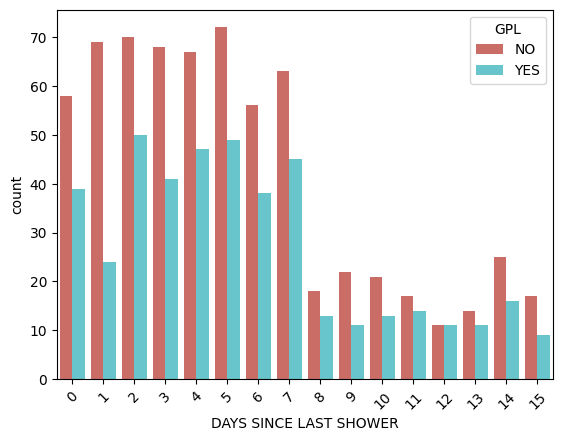

In [80]:
#days since last shower vs gpl
sns.countplot(x='DAYS SINCE LAST SHOWER', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

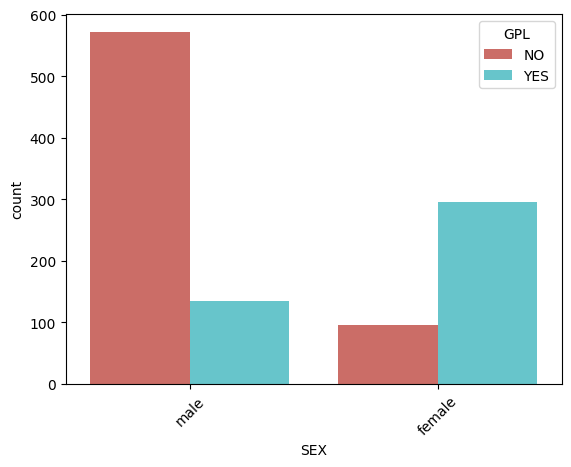

In [81]:
#sex vs gpl
sns.countplot(x='SEX', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

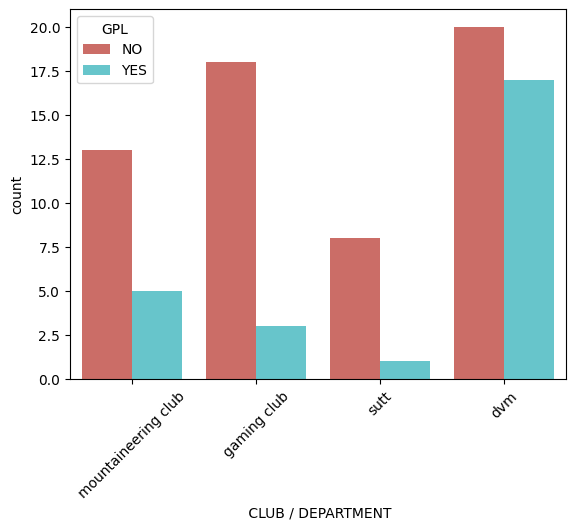

In [82]:
#club/dept. vs gpl
sns.countplot(x=' CLUB / DEPARTMENT', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

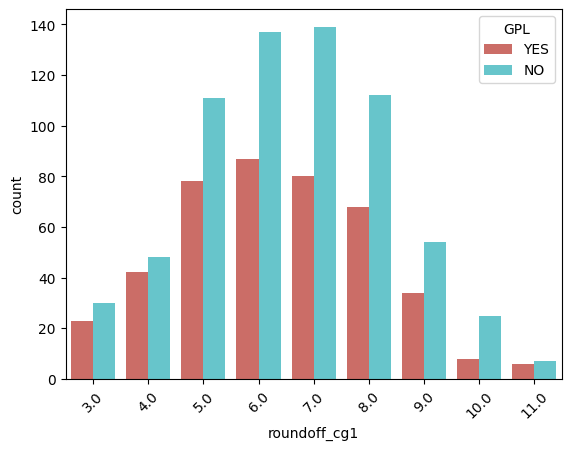

In [83]:
#cgpa-1 vs gpl
dataset["roundoff_cg1"]= np.round_(dataset["CGPA - 1"], decimals = 0, out = None)
sns.countplot(x='roundoff_cg1',data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

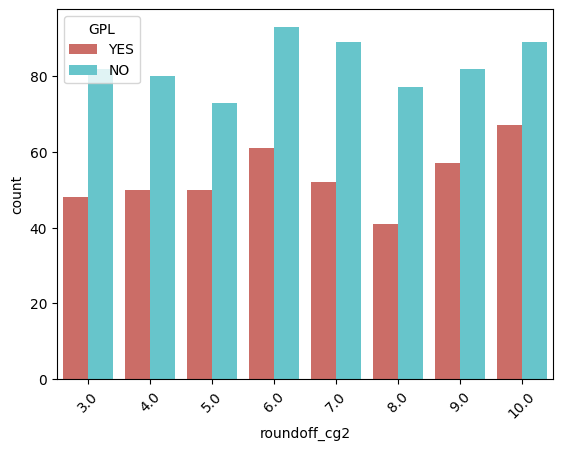

In [84]:
#cgpa-2 vs gpl
dataset["roundoff_cg2"]= np.round_(dataset["CGPA-2"], decimals = 0, out = None)
sns.countplot(x='roundoff_cg2', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

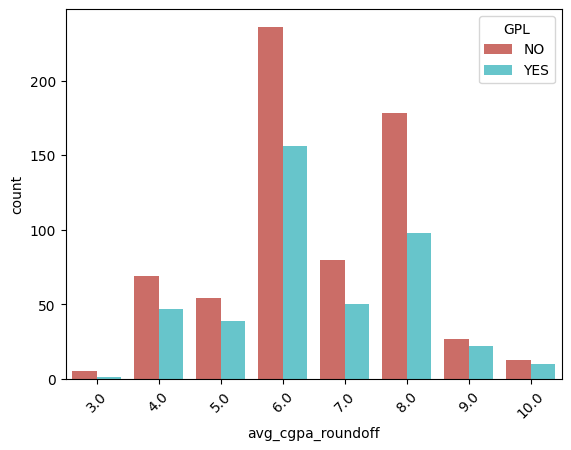

In [85]:
dataset['avg_cgpa']= dataset["roundoff_cg1"]/2+dataset["roundoff_cg2"]/2
dataset['avg_cgpa_roundoff']=np.round_(dataset["avg_cgpa"], decimals = 0, out = None)
sns.countplot(x='avg_cgpa_roundoff', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

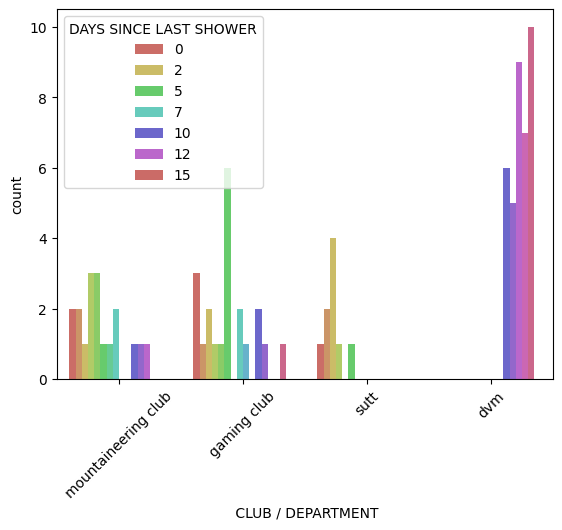

In [86]:
#checking how often people in different clubs bath
sns.countplot(x=' CLUB / DEPARTMENT', data=dataset, palette='hls', hue='DAYS SINCE LAST SHOWER')
plt.xticks(rotation=45)
plt.show()

In [87]:
#birth day,month,year may help in predicting gpl lets analyze
dataset['bmonth'] = dataset['BIRTHDAY'].str.split('/').str[0]
dataset['bdate'] = dataset['BIRTHDAY'].str.split('/').str[1]
dataset['byear'] = dataset['BIRTHDAY'].str.split('/').str[2]

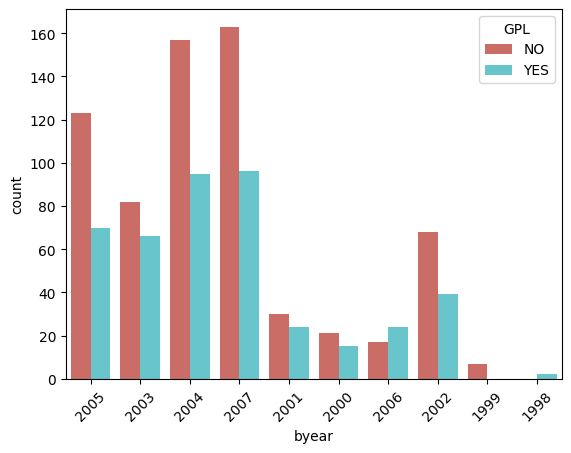

In [88]:
#plot byear vs gpl
sns.countplot(x='byear', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

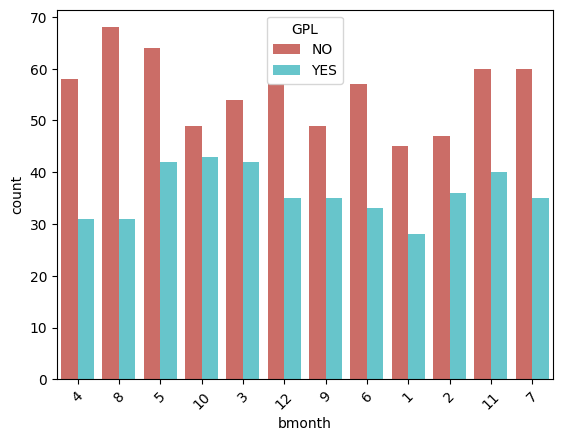

In [89]:
#plot bmonth vs gpl
sns.countplot(x='bmonth', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

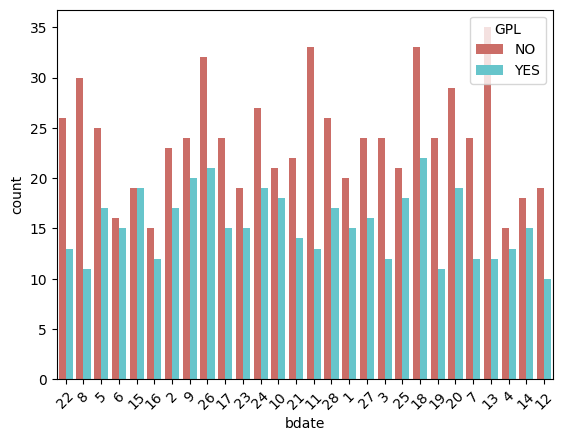

In [90]:
#plot bdate vs gpl
sns.countplot(x='bdate', data=dataset, palette='hls', hue='GPL')
plt.xticks(rotation=45)
plt.show()

In [91]:
#seems like we have an inverse relationship with cgpa
#female sex has a direct relationship :)
#yes indeed its true dvm members smell a bit
#days since last shower is directly prop to gpl (taking no.of yes/no.of no ratio)

In [92]:
#ridge model
from sklearn.linear_model import Ridge
classifier = Ridge(random_state = 0)
classifier.fit(X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], y_train)

Ridge(random_state=0)

In [93]:
y_pred = classifier.predict(X_test[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]])
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.96272025 1.        ]
 [0.09233901 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.21897455 0.        ]
 [0.96272025 1.        ]
 [0.09233901 0.        ]
 [0.42153532 0.        ]
 [0.76015948 1.        ]
 [0.63352394 0.        ]
 [0.42153532 0.        ]
 [0.63352394 1.        ]
 [0.76015948 1.        ]
 [0.63352394 0.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.42153532 0.        ]
 [0.76015948 0.        ]
 [0.63352394 1.        ]
 [0.63352394 0.        ]
 [0.25118532 1.        ]
 [0.63352394 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.96272025 1.        ]
 [0.63352394 1.        ]
 [0.96272025 1.        ]
 [0.63352394 1.        ]
 [0.09233901 0.        ]
 [0.09233901 0.        ]
 [0.63352394 0.        ]
 [0.76015948 1.        ]
 [0.09233901 0.        ]
 [0.76015948 1.        ]
 [0.76015948 1.        ]
 [0.01968627 0.        ]
 [0.96272025 1.        ]
 [0.42153532 1.        ]
 [0.6657347  0.        ]


In [94]:
y_pred_roundoff=np.where(np.array(y_pred)>0.5,1,0)

In [95]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_roundoff)
print(cm)
accuracy_score(y_test, y_pred_roundoff)

[[111  18]
 [ 33  58]]


0.7681818181818182

In [96]:
seniors = pd.read_csv('seniors.csv')

In [97]:
X_sen = seniors.drop(['NAME'], axis=1)

In [98]:
#encoding the categorical data using one hot encoding
#independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# dataset[' CLUB / DEPARTMENT'].replace('', 'NA', inplace=True)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'ADMISSION MODE', ' CLUB / DEPARTMENT', 'BOARD STUDIED', ' HAS A S/O ?', 'ATTENDS LECTURES','CHARACTER'])], remainder='passthrough')
X_sen = np.array(ct.fit_transform(X_sen))

In [100]:
from sklearn.preprocessing import StandardScaler
columns_to_stand = [1,3,4,7,9,13,14,15]
sc = StandardScaler()
X_sen[:, columns_to_stand] = sc.fit_transform(X_sen[:, columns_to_stand])

In [106]:
y_pred = classifier.predict(X_sen[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]])
print(y_pred)

[ 0.97289318  0.12139116  0.09756947  0.08333416  0.17922799  0.1287881
 -0.03952529  0.14060285 -0.21104171  0.06233335 -0.07520323]
